#### Importing Libraries

In [376]:
import pandas as pd
import numpy as np
from IPython.display import display
import matplotlib.pyplot as plt
import seaborn as sns

#### Data loading

In [338]:
DIR = "./data"
cities=pd.read_csv(f'{DIR}/cities.csv')
providers=pd.read_csv(f'{DIR}/providers.csv')
stations=pd.read_csv(f'{DIR}/stations.csv')
ticket_data=pd.read_csv(f'{DIR}/ticket_data.csv')

#### Exploring the dataset

In [339]:
display(cities.head())
display(providers.head())
display(stations.head())
display(ticket_data.head())

,id,local_name,unique_name,latitude,longitude,population
0,5159,"Padua, Veneto, Italia",padua,45.406435,11.876761,209678.0
1,76,"Barcelona, Cataluña, España",barcelona,41.385064,2.173404,1611822.0
2,81,"Basel, Basel-Stadt, Schweiz",basel,47.593437,7.619812,NaN
3,259,"Erlangen, Bayern, Deutschland",erlangen,49.589674,11.011961,105412.0
4,11979,"Balș, Olt, România",balș,44.353354,24.095672,NaN


,id,company_id,provider_id,name,fullname,has_wifi,has_plug,has_adjustable_seats,has_bicycle,transport_type
0,9,1,NaN,ouibus,Ouibus,True,True,True,False,bus
1,10,2,NaN,deinbus,Deinbus.de,False,False,False,False,bus
2,11,3,NaN,infobus,Infobus,False,False,False,False,bus
3,12,4,NaN,studentAgency,Student Agency,False,False,False,False,bus
4,13,5,NaN,flixbus,Flixbus,True,False,False,False,bus


,id,unique_name,latitude,longitude
0,1,Aalen (Stuttgarter Straße),48.835296,10.092956
1,2,Aéroport Bordeaux-Mérignac,44.830226,-0.700883
2,3,Aéroport CDG,49.009900,2.559310
3,4,Aéroport de Berlin-Schönefeld,52.389446,13.520345
4,5,Aéroport de Dresden,51.123604,13.764737


,id,company,o_station,d_station,departure_ts,arrival_ts,price_in_cents,search_ts,middle_stations,other_companies,o_city,d_city
0,6795025,8385,NaN,NaN,2017-10-13 14:00:00+00,2017-10-13 20:10:00+00,4550,2017-10-01 00:13:31.327+00,NaN,NaN,611,542
1,6795026,9,63.0,1044.0,2017-10-13 13:05:00+00,2017-10-14 06:55:00+00,1450,2017-10-01 00:13:35.773+00,"{149,418}",{13},611,542
2,6795027,8377,5905.0,6495.0,2017-10-13 13:27:00+00,2017-10-14 21:24:00+00,7400,2017-10-01 00:13:40.212+00,"{798,798,6794,6246}","{8377,8376}",611,542
3,6795028,8377,5905.0,6495.0,2017-10-13 13:27:00+00,2017-10-14 11:02:00+00,13500,2017-10-01 00:13:40.213+00,"{798,798,6794,6246}","{8377,8376}",611,542
4,6795029,8381,5905.0,6495.0,2017-10-13 21:46:00+00,2017-10-14 19:32:00+00,7710,2017-10-01 00:13:40.213+00,"{5983,5983}",{8380},611,542


### First task : information extraction
#### 1. Price statistics for a specific path

In [340]:
#Functions to calculate min, max, average price for a specific path
def path_price_statistic(path,statistic_type='count'):
    """
    Returns interesting statistics about the price regarding a specific path

    Parameters
    ----------
    path : dict {'o_station':float,'d_station':float}
    statistic_type : string, accepted values are 'count','mean','std','min','max'

    Returns
    -------
    price statistic (min,max,mean...ect) : float

    Examples
    --------
    >>> path={'o_station':5905.0,'d_station':6495.0}  # Path/trajet
    >>> statistic_type = 'mean'  # Berlin
    >>> path_price_statistic(path,statistic_type)
    9536.6
    """
    o_station=path['o_station']
    d_station=path['d_station']
    path_data = ticket_data[(ticket_data['o_station']==o_station) & (ticket_data['d_station']==d_station)]
    price_statistic = path_data['price_in_cents'].describe().get(statistic_type,'invalid_statistic')
    return price_statistic
    
path={'o_station':5905.0,'d_station':6495.0}
mean_p=path_price_statistic(path,'mean')
print(f'For the path {path}\n -> The mean price is {mean_p}')

For the path {'o_station': 5905.0, 'd_station': 6495.0}
 -> The mean price is 9536.666666666666


#### 2. Duration information for a specific path

In [341]:
import datetime
import warnings
warnings.filterwarnings('ignore')

def path_duration_statistic(path,statistic_type='max'):
    """
    Returns statistics about the duration of a specific path

    Parameters
    ----------
    path : dict {'o_station':float,'d_station':float}
    statistic_type : string, accepted values are 'count','mean','std','min','max'

    Returns
    -------
    statistic about the duration IN SECONDS!!  (min,max,mean...ect) : float

    Example
    --------
    >>> path={'o_station':5905.0,'d_station':6495.0}  # Path/trajet
    >>> statistic_type = 'max'  # Berlin
    >>> path_duration_statistic(path,statistic_type)
    115020.0
    """
    o_station=path['o_station']
    d_station=path['d_station']
    path_data = ticket_data[(ticket_data['o_station']==o_station) & (ticket_data['d_station']==d_station)]
    departure_time=path_data['departure_ts'].astype('datetime64[ns]')
    arrival_time=path_data['arrival_ts'].astype('datetime64[ns]')
    path_data["duration"]=(arrival_time-departure_time).dt.total_seconds()
    duration_statistic = path_data['duration'].describe().get(statistic_type,'invalid_statistic')
    return duration_statistic

def time_string(seconds=0):
    """
    Returns statistics about the duration of a specific path

    Parameters
    ----------
    seconds : number of seconds (float)

    Returns
    -------
    a string expressing the duration

    Example
    --------
    >>> time_string(115020.0)
    >>> 1 day, 7:57:00
    """
    return str(datetime.timedelta(seconds=seconds))

duration_statistic=path_duration_statistic(path,'max')
print(f'For the path {path}\n -> The max duration is {duration_statistic} in seconds\n -> Which equals {time_string(duration_statistic)}')

For the path {'o_station': 5905.0, 'd_station': 6495.0}
 -> The max duration is 115020.0 in seconds
 -> Which equals 1 day, 7:57:00


### Second task :
#### Diffrences of average prices and duration for diffrent transport types and path lengths


Here I defined a distance function that I need to calculate distance between coordinates, Note that in a production setting, i would prefer to use a more robust package such as geopy, i didn't wanna install externals packages for this test as it's not the point, but I felt i should point this out.

In [342]:
import math


def distance(origin, destination):
    """
    Calculate the Haversine distance.

    Parameters
    ----------
    origin : tuple of float
        (lat, long)
    destination : tuple of float
        (lat, long)

    Returns
    -------
    distance_in_km : float

    Examples
    --------
    >>> origin = (48.1372, 11.5756)  # Munich
    >>> destination = (52.5186, 13.4083)  # Berlin
    >>> round(distance(origin, destination), 1)
    504.2
    """
    lat1, lon1 = origin
    lat2, lon2 = destination
    radius = 6371  # km

    dlat = math.radians(lat2 - lat1)
    dlon = math.radians(lon2 - lon1)
    a = (math.sin(dlat / 2) * math.sin(dlat / 2) +
         math.cos(math.radians(lat1)) * math.cos(math.radians(lat2)) *
         math.sin(dlon / 2) * math.sin(dlon / 2))
    c = 2 * math.atan2(math.sqrt(a), math.sqrt(1 - a))
    d = radius * c

    return d


Merging ticket_data Dataframe with providers and stations Dataframe to extract transport_type and coordinates information, then i'm creating a new column "duration" calculated from the diffrence between arrival and departure time

In [343]:
ticket_station_merged = ticket_data.merge(providers.drop_duplicates(subset='company_id', keep="last"),how='inner',left_on='company', right_on='company_id')
ticket_station_merged = ticket_station_merged.merge(stations,left_on='o_station',right_on='id',how='left')
ticket_station_merged = ticket_station_merged.merge(stations,left_on='d_station',right_on='id',how='left')
departure_time=ticket_station_merged['departure_ts'].astype('datetime64[ns]')
arrival_time=ticket_station_merged['arrival_ts'].astype('datetime64[ns]')
ticket_station_merged["duration"]=(arrival_time-departure_time).dt.total_seconds()

Creation of a new column "distance" that uses the previously defined distance function to convert deprature and arrival coordinates to distance in Km

In [344]:
ticket_station_merged["distance"]=ticket_station_merged.apply(lambda row:distance((row['latitude_x'],row['longitude_x']),(row['latitude_y'],row['longitude_y'])),axis=1)

We keep the important columns as stated below

In [345]:
ticket_station_merged=ticket_station_merged[['o_station','d_station','price_in_cents','transport_type','distance','duration']]


In [346]:
def price_duration_statistics(min_distance=0,max_distance=float('inf')):
    """
    Returns statistics about price and duration for paths with distance belonging to the range specified in the argument

    Parameters
    ----------
    min_distance : float
    max_distance : float


    Returns
    -------
    Dataframe with average price, distance and duration for the all transport types

    """
    df_cond = ticket_station_merged[
        (ticket_station_merged['distance']>=min_distance) &
        (ticket_station_merged['distance']<=max_distance)
    ]
    df_cond = df_cond.groupby(['transport_type']).mean()
    return df_cond[['price_in_cents','distance','duration']]

distance_ranges = [(0,200),(201,800),(801,2000),(2000,float('inf'))]
for distance_range in distance_ranges:
    min_distance,max_distance=distance_range
    display(price_duration_statistics(min_distance,max_distance).head())


,price_in_cents,distance,duration
transport_type,,,
bus,1967.190813,146.840187,40363.250883
carpooling,1990.000000,124.482565,51300.000000


,price_in_cents,distance,duration
transport_type,,,
bus,3404.716348,472.119235,50692.464814
carpooling,4338.500000,441.500762,38175.000000
train,3265.555556,406.942154,45733.333333


,price_in_cents,distance,duration
transport_type,,,
bus,6112.71028,984.67443,87907.009346


,price_in_cents,distance,duration
transport_type,,,


##### Issues with the dataset

Even if we have a huge dataset, around 70k entries, there's also a huge lack of data values when it comes to providers dataframe, there are smaller and thus we can retrieve the transport type for every path.

The ticket_data is linked to providers dataframe through the company variable, but the transport type is special to the provider. this is an issue when we try to find the right transport type, especially if a company has providers that offer a variety of transport types.

### Bonus task : Price Prediction using Machine Learning

#### Data Preparation

In [347]:
data=pd.read_csv(f'{DIR}/ticket_data.csv')
data.head()

,id,company,o_station,d_station,departure_ts,arrival_ts,price_in_cents,search_ts,middle_stations,other_companies,o_city,d_city
0,6795025,8385,NaN,NaN,2017-10-13 14:00:00+00,2017-10-13 20:10:00+00,4550,2017-10-01 00:13:31.327+00,NaN,NaN,611,542
1,6795026,9,63.0,1044.0,2017-10-13 13:05:00+00,2017-10-14 06:55:00+00,1450,2017-10-01 00:13:35.773+00,"{149,418}",{13},611,542
2,6795027,8377,5905.0,6495.0,2017-10-13 13:27:00+00,2017-10-14 21:24:00+00,7400,2017-10-01 00:13:40.212+00,"{798,798,6794,6246}","{8377,8376}",611,542
3,6795028,8377,5905.0,6495.0,2017-10-13 13:27:00+00,2017-10-14 11:02:00+00,13500,2017-10-01 00:13:40.213+00,"{798,798,6794,6246}","{8377,8376}",611,542
4,6795029,8381,5905.0,6495.0,2017-10-13 21:46:00+00,2017-10-14 19:32:00+00,7710,2017-10-01 00:13:40.213+00,"{5983,5983}",{8380},611,542


We can see in the next cell how o_station and d_stations contain a huge amount of null values, while they represent very valuable information to represent a path

In [348]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74168 entries, 0 to 74167
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               74168 non-null  int64  
 1   company          74168 non-null  int64  
 2   o_station        32727 non-null  float64
 3   d_station        32727 non-null  float64
 4   departure_ts     74168 non-null  object 
 5   arrival_ts       74168 non-null  object 
 6   price_in_cents   74168 non-null  int64  
 7   search_ts        74168 non-null  object 
 8   middle_stations  32727 non-null  object 
 9   other_companies  32727 non-null  object 
 10  o_city           74168 non-null  int64  
 11  d_city           74168 non-null  int64  
dtypes: float64(2), int64(5), object(5)
memory usage: 6.8+ MB


In [349]:
data.nunique()

id                 74168
company               20
o_station            438
d_station            454
departure_ts       12660
arrival_ts         12740
price_in_cents      1699
search_ts          13266
middle_stations     1207
other_companies       90
o_city               306
d_city               332
dtype: int64

#### Data cleaning
Extraction of day/month/hour/minute of arrival and departure times, to take full advantage of the date string

In [350]:
#departure
data['departure_day'] = pd.to_datetime(data.departure_ts).dt.day
data['departure_month'] = pd.to_datetime(data.departure_ts).dt.month
data['departure_hour'] = pd.to_datetime(data.departure_ts).dt.hour
data['departure_minute'] = pd.to_datetime(data.departure_ts).dt.minute

#arrival
data['arrival_day'] = pd.to_datetime(data.departure_ts).dt.day
data['arrival_month'] = pd.to_datetime(data.departure_ts).dt.month
data['arrival_hour'] = pd.to_datetime(data.departure_ts).dt.hour
data['departure_minute'] = pd.to_datetime(data.departure_ts).dt.minute

Add duration feature in minutes

In [351]:
#Add journey duration as a feature (in minutes)
departure_time=data['departure_ts'].astype('datetime64[ns]')
arrival_time=data['arrival_ts'].astype('datetime64[ns]')
data["duration_min"]=(arrival_time-departure_time).dt.total_seconds()/60

Add distance feature to the dataset

In [352]:
#add other features such as distance
data = data.merge(stations[['id','latitude','longitude']],left_on='o_station',right_on='id',how='left')
data = data.merge(stations,left_on='d_station',right_on='id',how='left')
data["distance"]=data.apply(lambda row:distance((row['latitude_x'],row['longitude_x']),(row['latitude_y'],row['longitude_y'])),axis=1)


Here we will drop all features we consider not useful, such as index that doesnt hold significant business value, we drop the columns that we already exploited and generated better features from (deprature_ts...etc).

In [353]:
data.dropna(inplace=True)
cols_to_drop=["id_x","departure_ts","arrival_ts","search_ts","id_y","latitude_x","longitude_x","id","unique_name","latitude_y","longitude_y"]
data.drop(cols_to_drop,axis=1,inplace=True)
print(data.columns)

Index(['company', 'o_station', 'd_station', 'price_in_cents',
       'middle_stations', 'other_companies', 'o_city', 'd_city',
       'departure_day', 'departure_month', 'departure_hour',
       'departure_minute', 'arrival_day', 'arrival_month', 'arrival_hour',
       'duration_min', 'distance'],
      dtype='object')


We convert the middle_stations and other_stations from the current type which is a list of stations in string format to the number of stops, it's worth nothing that we may use valuable information, but this may still be an acceptable approach.

In [354]:
data['middle_stations']= data['middle_stations'].apply(lambda x:len(eval(x)))
data['other_companies']= data['other_companies'].apply(lambda x:len(eval(x)))


### Building Machine Learning Models

In [355]:


from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import r2_score

from math import sqrt

from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import KFold

def mean_absolute_percentage_error(y_true, y_pred): 
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

def show_results(y,y_pred,data_type="Train"):
    print(f"{data_type} Results for the Model:")
    print(50 * '-')
    print("Root mean squared error: ", sqrt(mse(y, y_pred)))
    print("Mean absolute % error: ", round(mean_absolute_percentage_error(y, y_pred)))
    print("R-squared: ", r2_score(y, y_pred))
    print("\n\n")



#### Splitting data to 70% for training, and 30% for testing the model performance.

In [356]:
y=data['price_in_cents']
X=data.drop(["price_in_cents"], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [357]:
print("The size of training input is", X_train.shape)
print("The size of training output is", y_train.shape)
print(50 *'-')
print("The size of testing input is", X_test.shape)
print("The size of testing output is", y_test.shape)

The size of training input is (22908, 16)
The size of training output is (22908,)
--------------------------------------------------
The size of testing input is (9819, 16)
The size of testing output is (9819,)


#### Heatmap

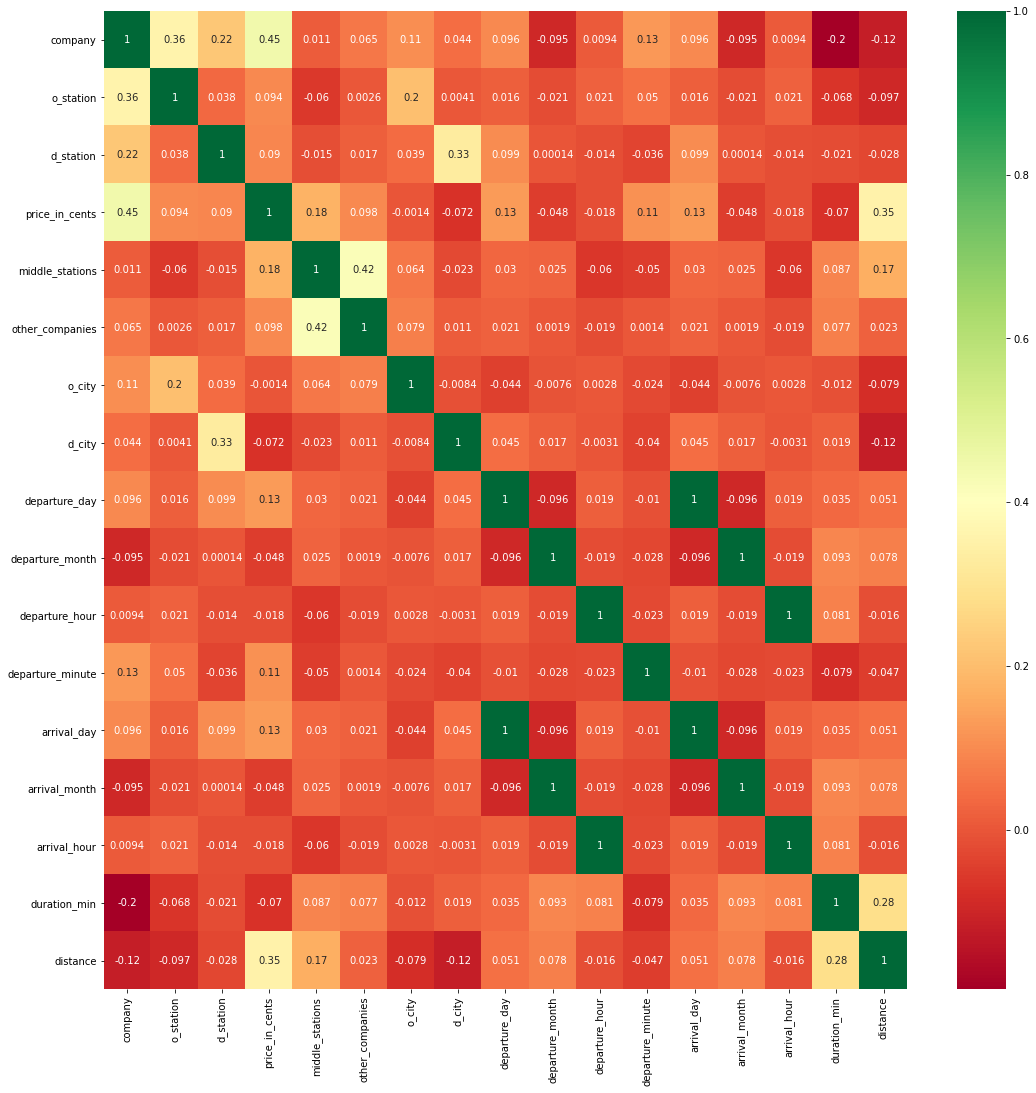

In [377]:
plt.figure(figsize = (18,18))
sns.heatmap(data.corr(), annot = True, cmap = "RdYlGn")

plt.show()

#### Ridge model

In [358]:
#Ridge
params ={'alpha' :[0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000, 10000, 100000]}
ridge_regressor =GridSearchCV(Ridge(), params ,cv =5,scoring = 'neg_mean_absolute_error', n_jobs =-1)
ridge_regressor.fit(X_train ,y_train)

GridSearchCV(cv=5, estimator=Ridge(), n_jobs=-1,
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000,
                                   10000, 100000]},
             scoring='neg_mean_absolute_error')

In [359]:
y_train_pred =ridge_regressor.predict(X_train) ##Predict train result
y_test_pred =ridge_regressor.predict(X_test) ##Predict test result

In [360]:
show_results(y_train,y_train_pred,"Train")
show_results(y_test,y_test_pred,"Test")

Train Results for the Model:
--------------------------------------------------
Root mean squared error:  3571.268573694667
Mean absolute % error:  53.0
R-squared:  0.39832315098479876



Test Results for the Model:
--------------------------------------------------
Root mean squared error:  3506.7102123279574
Mean absolute % error:  52.0
R-squared:  0.4115897773323438





#### Lasso model

In [361]:
#Lasso
params ={'alpha' :[0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000, 10000, 100000]}
lasso_regressor =GridSearchCV(Lasso(), params ,cv =15,scoring = 'neg_mean_absolute_error', n_jobs =-1)
lasso_regressor.fit(X_train ,y_train)

GridSearchCV(cv=15, estimator=Lasso(), n_jobs=-1,
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000,
                                   10000, 100000]},
             scoring='neg_mean_absolute_error')

In [362]:
y_train_pred =lasso_regressor.predict(X_train) ##Predict train result
y_test_pred =lasso_regressor.predict(X_test) ##Predict test result

In [363]:
show_results(y_train,y_train_pred,"Train")
show_results(y_test,y_test_pred,"Test")

Train Results for the Model:
--------------------------------------------------
Root mean squared error:  3570.804479371709
Mean absolute % error:  53.0
R-squared:  0.3984795193231234



Test Results for the Model:
--------------------------------------------------
Root mean squared error:  3506.4031021340384
Mean absolute % error:  52.0
R-squared:  0.41169283624151476





#### K Neighbors Regressor model

In [364]:
## K Neighbors Regressor
k_range = list(range(1, 30))
params = dict(n_neighbors = k_range)
knn_regressor = GridSearchCV(KNeighborsRegressor(), params, cv =10, scoring = 'neg_mean_squared_error')
knn_regressor.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=KNeighborsRegressor(),
             param_grid={'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                         13, 14, 15, 16, 17, 18, 19, 20, 21, 22,
                                         23, 24, 25, 26, 27, 28, 29]},
             scoring='neg_mean_squared_error')

In [365]:
y_train_pred =knn_regressor.predict(X_train) ##Predict train result
y_test_pred =knn_regressor.predict(X_test) ##Predict test result

In [366]:
show_results(y_train,y_train_pred,"Train")
show_results(y_test,y_test_pred,"Test")

Train Results for the Model:
--------------------------------------------------
Root mean squared error:  850.642194652542
Mean absolute % error:  7.0
R-squared:  0.9658640400936955



Test Results for the Model:
--------------------------------------------------
Root mean squared error:  1613.503784824169
Mean absolute % error:  15.0
R-squared:  0.8754280020366481





#### Decision Tree Regressor model

In [367]:
# Decision Tree Regressor
depth  =list(range(3,30))
param_grid =dict(max_depth =depth)
tree =GridSearchCV(DecisionTreeRegressor(),param_grid,cv =10)
tree.fit(X_train,y_train)

GridSearchCV(cv=10, estimator=DecisionTreeRegressor(),
             param_grid={'max_depth': [3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14,
                                       15, 16, 17, 18, 19, 20, 21, 22, 23, 24,
                                       25, 26, 27, 28, 29]})

In [368]:
y_train_pred =tree.predict(X_train) ##Predict train result
y_test_pred =tree.predict(X_test) ##Predict test resul

In [369]:
show_results(y_train,y_train_pred,"Train")
show_results(y_test,y_test_pred,"Test")

Train Results for the Model:
--------------------------------------------------
Root mean squared error:  270.29706432181524
Mean absolute % error:  1.0
R-squared:  0.9965533202322523



Test Results for the Model:
--------------------------------------------------
Root mean squared error:  1509.3335829458488
Mean absolute % error:  12.0
R-squared:  0.8909938694294862





#### Random Forest Regressor model

In [370]:
# Random Forest Regressor
tuned_params = {'n_estimators': [100, 200, 300, 400, 500], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4]}
random_regressor = RandomizedSearchCV(RandomForestRegressor(), tuned_params, n_iter = 20, scoring = 'neg_mean_absolute_error', cv = 5, n_jobs = -1)
random_regressor.fit(X_train, y_train)

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_iter=20,
                   n_jobs=-1,
                   param_distributions={'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500]},
                   scoring='neg_mean_absolute_error')

In [371]:
y_train_pred = random_regressor.predict(X_train)
y_test_pred = random_regressor.predict(X_test)

In [372]:
show_results(y_train,y_train_pred,"Train")
show_results(y_test,y_test_pred,"Test")

Train Results for the Model:
--------------------------------------------------
Root mean squared error:  478.2656285955991
Mean absolute % error:  4.0
R-squared:  0.989209126078108



Test Results for the Model:
--------------------------------------------------
Root mean squared error:  1155.4114709813484
Mean absolute % error:  11.0
R-squared:  0.93612163334161





#### Random Forest Regressor is giving Maximum Accuracy as compare to other Regressor algorithm.